In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
from skimage import feature

In [3]:
# Charger le fichier csv
file_path = "../data/dataset/sign_mnist_train.csv"
df = pd.read_csv(file_path)

# Premiere colonne -> labels
labels = df.iloc[:, 0].tolist()

# Supprimer la première colonne
images = df.drop(columns=["label"]).values

In [4]:
print(images.shape) 
image_shape = (28,28)  # images de 28*28 pixels

(27455, 784)


In [5]:
def number_to_letter(label):
    return chr(65 + label)  # Convertit le label en lettre (A=65 en ASCII)
    

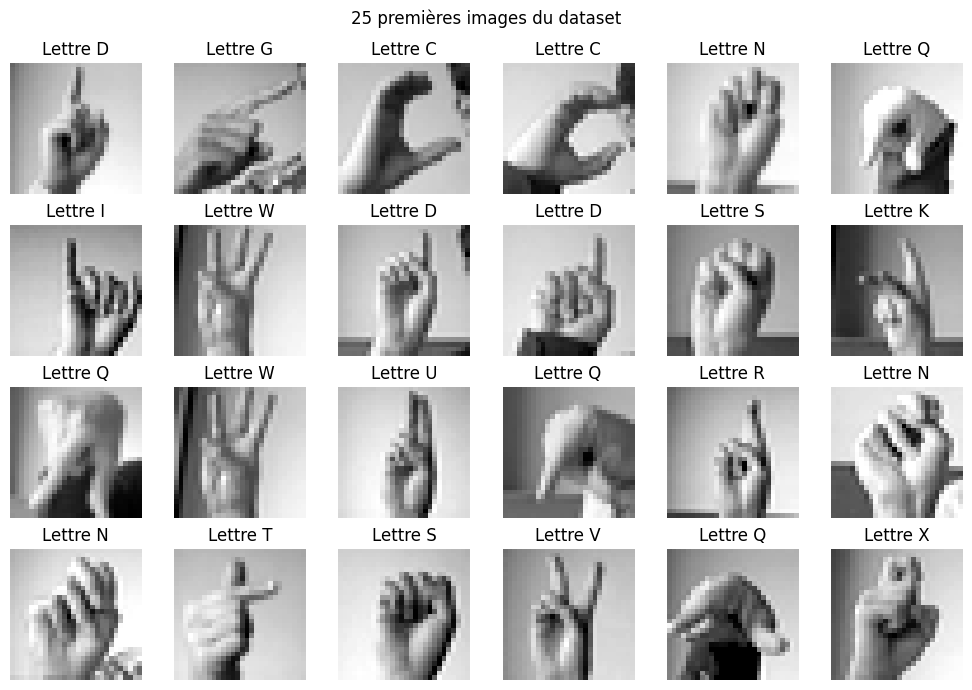

In [6]:
def display(images_dataset, num_images=25, rows=4, cols=6, size=(10,7), title=""):
    images_to_display = images_dataset[:num_images]  # Sélection des premières images
   
    # Création de la figure
    fig, axes = plt.subplots(rows, cols, figsize=size)
    
    # Affichage des images
    for i, ax in enumerate(axes.flat):
        if i < len(images_to_display):
            single_image = images_to_display[i].reshape(image_shape)  # Restructuration de l'image
            ax.imshow(single_image, cmap="gray")  # Afficher l'image
            ax.set_title("Lettre " + number_to_letter(labels[i]))  # Ajouter un titre
            ax.axis("off")  # Masquer les axes
        else:
            ax.axis("off")  # Masquer les sous-graphiques vides
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
display(images, 25, title="25 premières images du dataset")

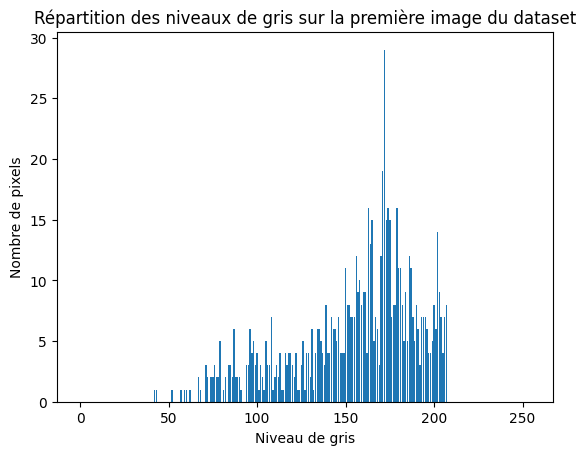

In [7]:
# Répartition des pixels par image
x=range(0, 255)
image = images[0]
values = [0] * 255
for i in range(0, 784): # pour chaque pixel de l'image
    values[image[i]]+=1 
    
### display
plt.bar(x, values)
plt.title("Répartition des niveaux de gris sur la première image du dataset")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")
plt.show()


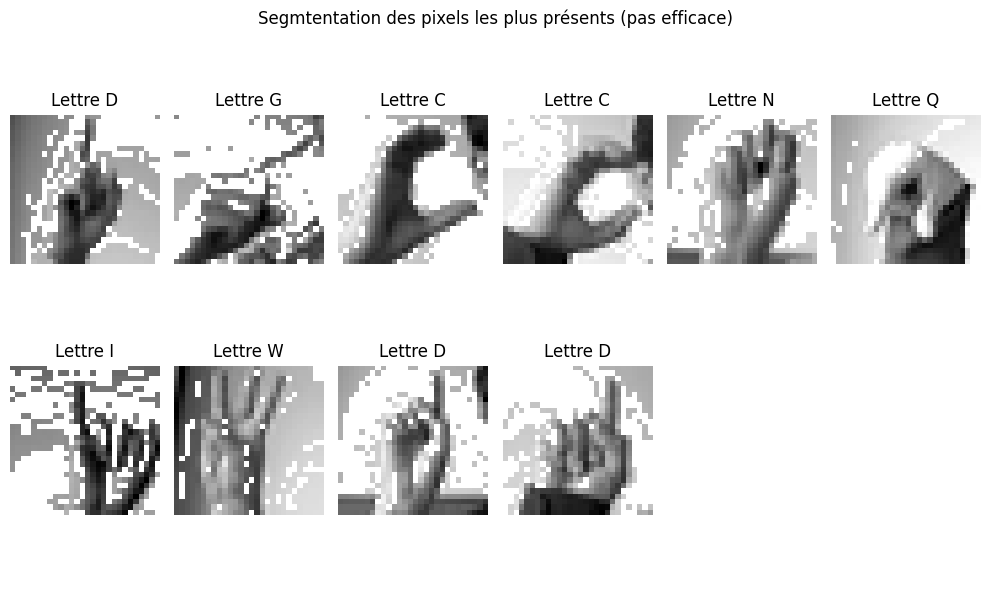

In [8]:
segmented_images = images.copy()
segmented_images = segmented_images[:10]

Ng_count = []

# Pour chaque image, répartition des niveaux de gris
for im in segmented_images:        #pour chaque image
    count = [0] * 255              # compteur des nuances de gris
    for px in im:                  # pour chaque pixel de l'image
        count[px-1] +=1              # on augmente le compteur
    Ng_count.append(count)
    

# Segmentation en fonction de la proportion du niveau de gris dans l'image

nb_d_appartion_du_px_max = 12# Si un pixel est présent plus de 10 fois dans l'image on considère que c'est le fond et on l'enlève

i=0
for im in segmented_images:
    current_Ng_count=Ng_count[i] 
    modified_px = 0
    for j in range(len(im)):
        if current_Ng_count[im[j]-1] >= nb_d_appartion_du_px_max: # si cette nuance de gris est trop présente dans l'image, on l'enlève
            im[j] = 255 # on met le pixel en noir
            modified_px += 1
    #print(modified_px)
    i+=1

display(segmented_images, 10, cols=6, rows=2, size=(10, 6), title="Segmtentation des pixels les plus présents (pas efficace)")


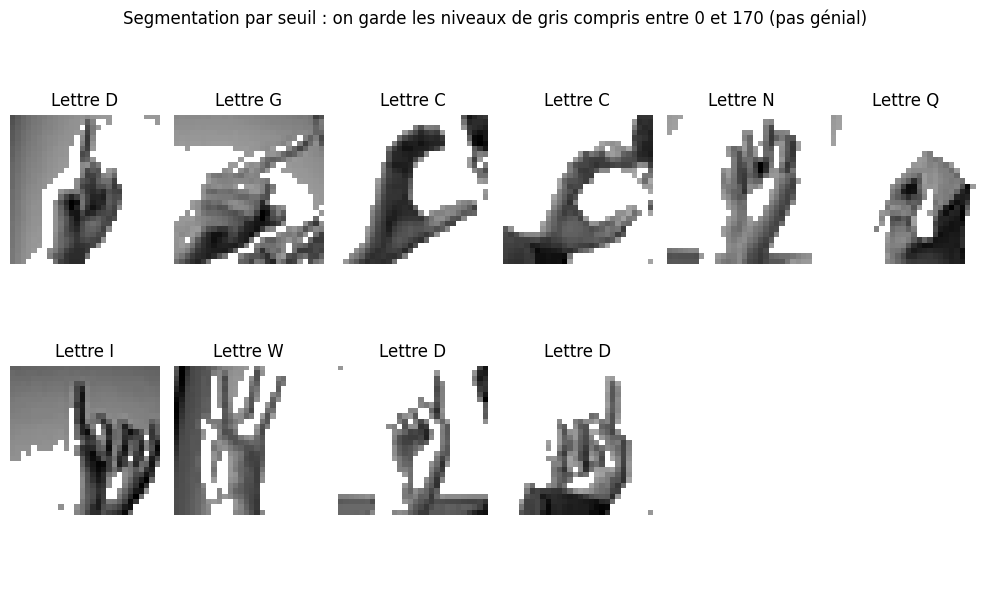

In [9]:
# Segmentation par seuil min max

segmented_images = images.copy()
segmented_images = segmented_images[:10]

# Niveaux de gris qu'on veut garder
seuil_min = 0
seuil_max = 170
   
for im in segmented_images[:10]:
    modified_px = 0
    for i in range(len(im)):
        if im[i] < seuil_min or im[i] > seuil_max:
            im[i] = 255 #pixel noir 
            modified_px += 1
    #print(modified_px)
    
display(segmented_images, 10, cols=6, rows=2, size=(10, 6), title="Segmentation par seuil : on garde les niveaux de gris compris entre "+str(seuil_min )+" et "+str(seuil_max)+ " (pas génial)")

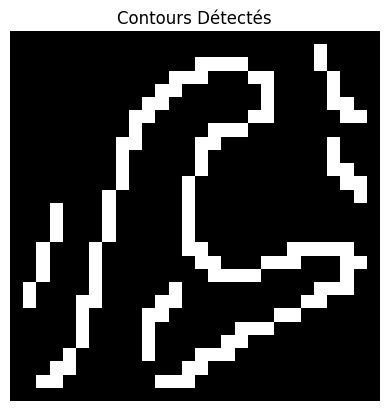

In [11]:
# Segmentation par contour (scikit-image)

segmented_images = images.copy()
segmented_images = segmented_images[:10]

im=segmented_images[2]

image = im.reshape(28, 28)
image = image.astype(np.uint8)

edges = feature.canny(image, sigma=1.0)



# Affichage des contours détectés
plt.imshow(edges, cmap='gray')
plt.title("Contours Détectés")
plt.axis("off")
plt.show()
